# Denoising Images Using SVD

---
#### Course: Computational Data Mining
#### Professor: Dr. Fatemeh Shakeri
#### Student: Ilya Khalafi
#### Student ID: 9913039
#### November 2023

# Table Of Contents
- [Introduction](#intro)
- [Dependencies](#dependency)
- [Importing Sample Image](#read)
- [Approach](#approach)
    - [Adding Noise](#noise)
    - [Denoising Using SVD](#svd)
- [Final Comparison](#comparison)

<a name="intro"></a>

# Introduction 📚

---

In Computer Vision, one of the well-known tasks is image restoration and, Specifically, image denoising. 

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/e/e8/ROF_Denoising_Example.png/400px-ROF_Denoising_Example.png" width="500"/>

One of the most essential matrix decompositions in numerical linear algebra is Singular Values Decomposition (SVD), which decomposes a matrix into two orthogonal matrices and one diagonal matrix.

SVD has several applications, from dimensionality reduction to facial recognition, and, in general, it can be used wherever we want to extract essential features of a set of data. One of the possible applications of SVD is image denoising, where we extract and remove the smallest singular values that we expect to be equivalent to the noise of our image.

In this article, we use SVD to denoise already noised images.

<a name="dependency"></a>

#Dependencies 🧰

---

We need the following libraries during this article:

- **numpy** : <br />
    Numpy is a commonly used library for doing scientific computations. Unlike Python's default pointer structure, numpy saves variables in place and continuously on RAM and also provides sophisticated methods that use parallelism to make our computations much faster.

- **PIL**: <br />
    PIL, or Pillow Library, is a common, well-known library for image processing. It helps us to read, manipulate, and save images. We will use it together with OpenCV.

- **matplotlib** : <br />
    Matplotlib is a well-known library in data science for visualization. We will use matplotlib to demonstrate our results.

- **seaborn** : <br />
    seaborn is built on matplotlib and provides many chart templates for us, so we don't need to draw and build every component of our charts with matplotlib.

- **scikit-learn (sklearn)** : <br />
    This library is a known data science library.

- **cv2** : <br />
    OpenCV or cv2 is probably the most well-known and most useful Python library for image and video processing.

In [1]:
%%capture
# Python Standard Libraries
import random
# Fundamental Data & Image Analysis Tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image
import cv2

<a name="read"></a>

#Importing Sample Image 🖼

---

We need a sample image to perform our experiments on. Therefore, we will use the famous photo of classic image processing named "<b>Lenna<b/>".

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png" width="300"/>


In [4]:
%%capture
# Downloading the photo...
!wget - q "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png"

# Importing the image
lenna_img = np.array(Image.open("220px-Lenna_(test_image).png"))
print("Image imported successfully!")

Now let's demonstrate our photo for a quick preview!

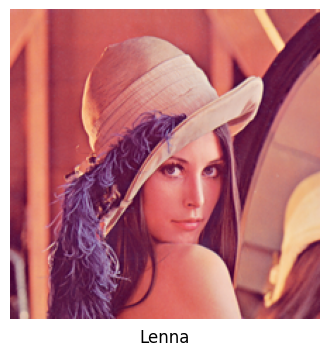

In [6]:
plt.figure(figsize=(4, 8))
plt.axis('off')
plt.title('Lenna', y=-0.1)
plt.imshow(lenna_img)

Additionally, we define a function that takes an image and another function and applies the given function on each channel of the given image.

In [12]:
def apply_on_channels(img, func):
    output = img.copy()
    for channel in range(img.shape[-1]):
        output[:, :, channel] = func(output[:, :, channel])
    
    return output

Now we test this function:

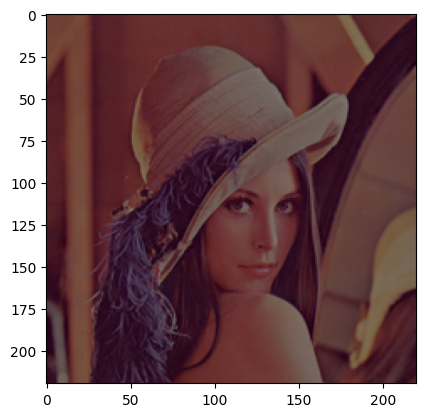

In [13]:
new_lenna = apply_on_channels(lenna_img, lambda x: x / 2) # divide the values of ach pixel by 2
plt.imshow(new_lenna)

<a name="approach"></a>

#Approach 🧭

---


We will try to use SVD to remove extraneous principal components of the image that are equivalent to the smallest eigenvalues. This, in turn, leads to denoising our image because we expect to remove noises that are dependent on the smallest eigenvalues.

<a name="noise"></a>

###Adding Noise🏋

---

First, we must add some noise to experiment with our method's performance. We test two types of noises:

- Gaussian Noise
- Salt and Pepper Noise

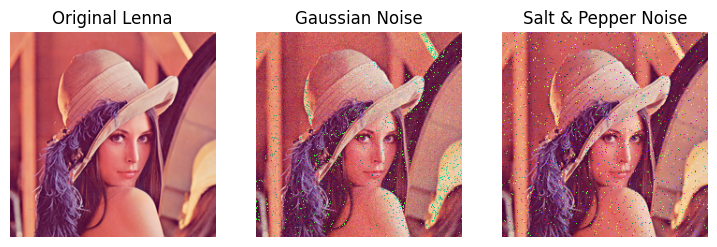

In [22]:
# Function for Adding Gaussian Noise
def add_gas_noise(img):
    gaussian_noise = np.random.normal(loc=0, scale=12, size=img.shape)
    gas_img = img + gaussian_noise
    return gas_img

# Function for Adding Salt and Pepper noise
def add_sp_noise(img):
    salt_pepper = np.random.choice([-1, 0, 1], size=img.shape, p=[0.0125, 0.975, 0.0125])
    sp_img = np.where(salt_pepper == -1, 0, np.where(salt_pepper == 1, 255, img))
    return sp_img

# Apply functions to add noises
gas_img = apply_on_channels(lenna_img, add_gas_noise)
sp_img = apply_on_channels(lenna_img, add_sp_noise)

# Plotting our noised images
# Making a figure of size 18 x 9
plt.figure(figsize=(9, 8))

# Plotting the Original Lenna
plt.subplot(1, 3, 1)
plt.title('Original Lenna')
plt.axis('off')
plt.imshow(lenna_img)

# Plotting Lenna with Gaussian Noise
plt.subplot(1, 3, 2)
plt.title('Gaussian Noise')
plt.axis('off')
plt.imshow(gas_img)

# Plotting Lenna with Salt & Pepper Noise
plt.subplot(1, 3, 3)
plt.title('Salt & Pepper Noise')
plt.axis('off')
plt.imshow(sp_img)

<a name="svd"></a>

###Denoising Using SVD

---

Now, we calculate the SVD of the matrix of our noised images in order to extract singular values and their equivalent principal components.

In [23]:
# Calculating Singular Values of Matrices
# SVD outputs: U, Sorted Singular Values, V
lenna_svds = [np.linalg.svd(lenna_img[:, :, c]) for c in range(lenna_img.shape[-1])]
gas_svds = [np.linalg.svd(gas_img[:, :, c]) for c in range(gas_img.shape[-1])]
sp_svds = [np.linalg.svd(sp_img[:, :, c]) for c in range(sp_img.shape[-1])]

Before denoising images using SVD, let's plot the sequence of singular values for each image and their difference from the original image.

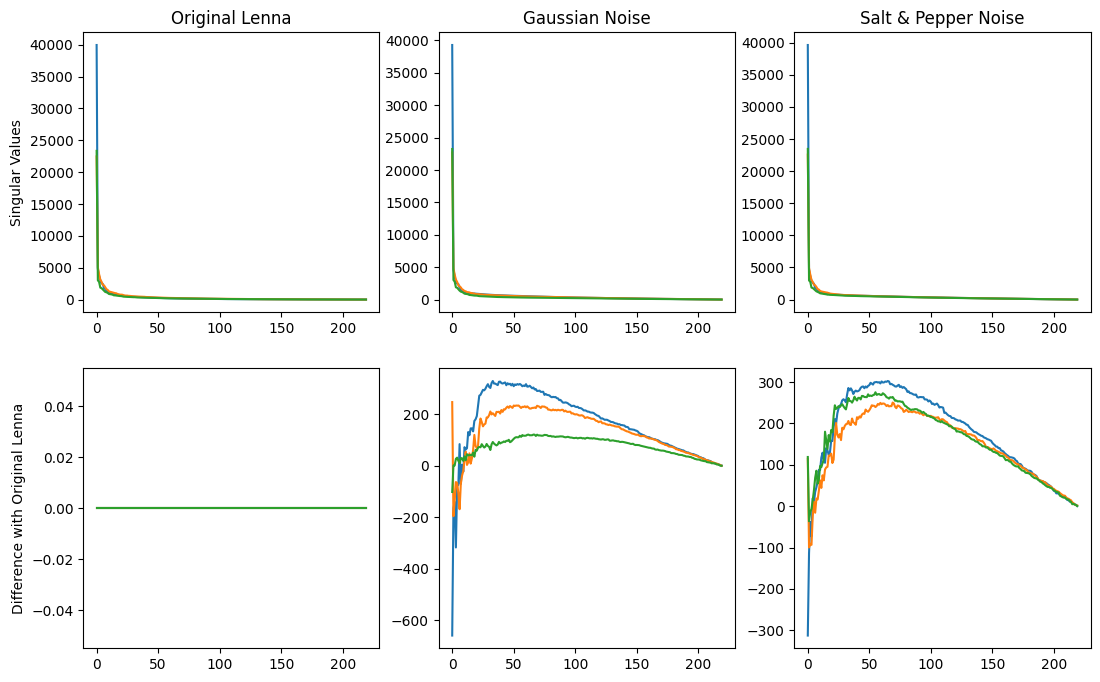

In [31]:
plt.figure(figsize=(13, 8))

# Plotting the Original Lenna
plt.subplot(2, 3, 1)
plt.title('Original Lenna')
plt.ylabel("Singular Values")
for c in range(lenna_img.shape[-1]):
    plt.plot(lenna_svds[c][1])

# Plotting Gaussian Noised Singular Values
plt.subplot(2, 3, 2)
plt.title('Gaussian Noise')
for c in range(gas_img.shape[-1]):
    plt.plot(gas_svds[c][1])

# Plotting Salt & Pepper Noised Singular Values
plt.subplot(2, 3, 3)
plt.title('Salt & Pepper Noise')
for c in range(sp_img.shape[-1]):
    plt.plot(sp_svds[c][1])

# Plotting Lenna Minus Lenna Singular Values
plt.subplot(2, 3, 4)
plt.ylabel('Difference with Original Lenna')
for c in range(lenna_img.shape[-1]):
    plt.plot(lenna_svds[c][1] - lenna_svds[c][1])

# # Plotting Gaussian Noised Minus Lenna Singular Values
plt.subplot(2, 3, 5)
for c in range(lenna_img.shape[-1]):
    plt.plot(gas_svds[c][1] - lenna_svds[c][1])

# Plotting Salt & Pepper Noised Minus Lenna Singular Values
plt.subplot(2, 3, 6)
for c in range(lenna_img.shape[-1]):
    plt.plot(sp_svds[c][1] - lenna_svds[c][1])


Here are some noticeable observations:

- Although Gaussian Noise follows a specific distribution to add noise, it seems Salt and pepper Noise's effect on singular values is smoother.

- Counterintuitively, both types of noises affect middle singular values more than other singular values; therefore, removing the smallest singular values necessarily will not result in a better result.

For the sake of Homework3, we remove k smallest singular values for nine different values of k, and we plot the results to find the best value for k. Our images have 220 singular values; therefore, we test k = 5, 10, 15, 20, 25, 30, 35, 40, and 45.

First, we define a function that calculates the SVD of each channel and removes the k-smallest singular values.

In [37]:
# Function to remove the k-smallet singular values
def remove_k_smallest(k):
    def remove(img):
        svd = np.linalg.svd(img)
        denoised_sv = svd[1]
        denoised_sv[-k:] = 0
        return svd[0] @ np.diag(denoised_sv) @ svd[2]
    return remove 

Now, we apply this function on each channel of the gaussian noised image.

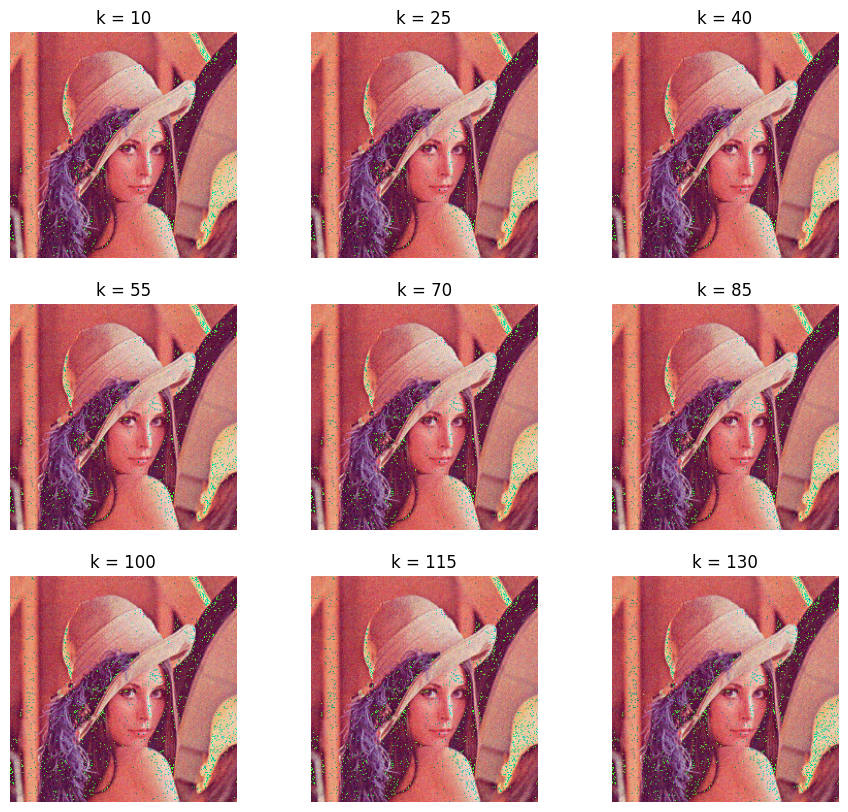

In [42]:
plt.figure(figsize=(11, 10))

k_vals = [10, 25, 40, 55, 70, 85, 100, 115, 130]
# Plotting denoise image for gaussian noised image
for i, k in enumerate(k_vals):
    plt.subplot(3, 3, i+1)
    plt.title(f'k = {k}')
    plt.axis('off')
    denoised = apply_on_channels(gas_img, remove_k_smallest(k))
    plt.imshow(denoised)

Next, we repeat this procedure for Salt & Pepper noised image.

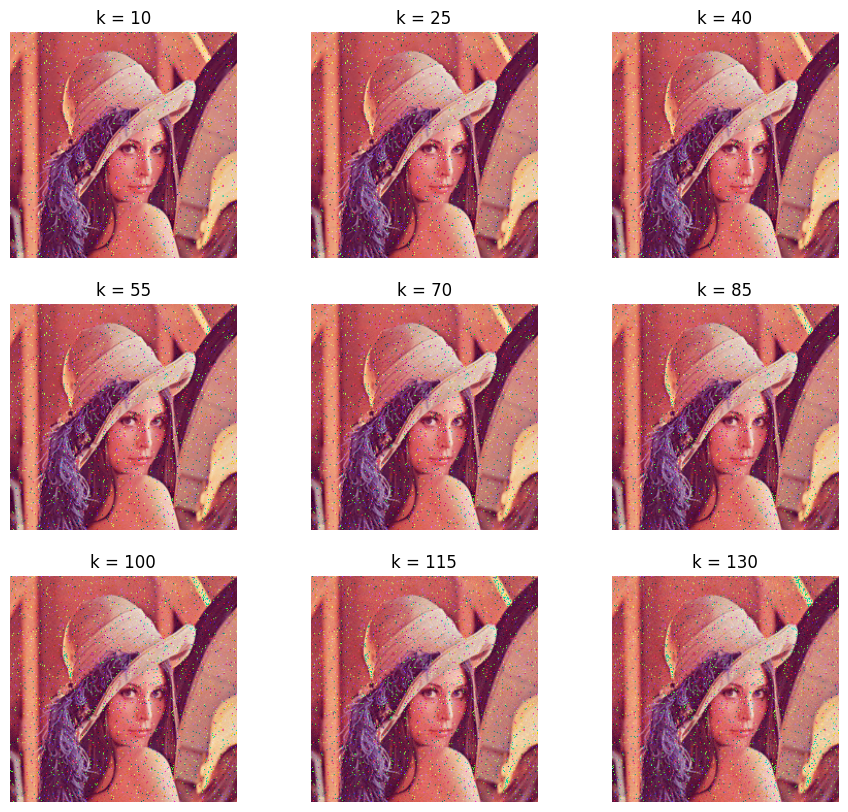

In [43]:
plt.figure(figsize=(11, 10))

k_vals = [10, 25, 40, 55, 70, 85, 100, 115, 130]
# Plotting denoise image for gaussian noised image
for i, k in enumerate(k_vals):
    plt.subplot(3, 3, i+1)
    plt.title(f'k = {k}')
    plt.axis('off')
    denoised = apply_on_channels(sp_img, remove_k_smallest(k))
    plt.imshow(denoised)

I do not believe this method is sophisticated enough to restore our images against such noises, and, personally, I cannot see any difference. Anyway, here are our images to compare them. 

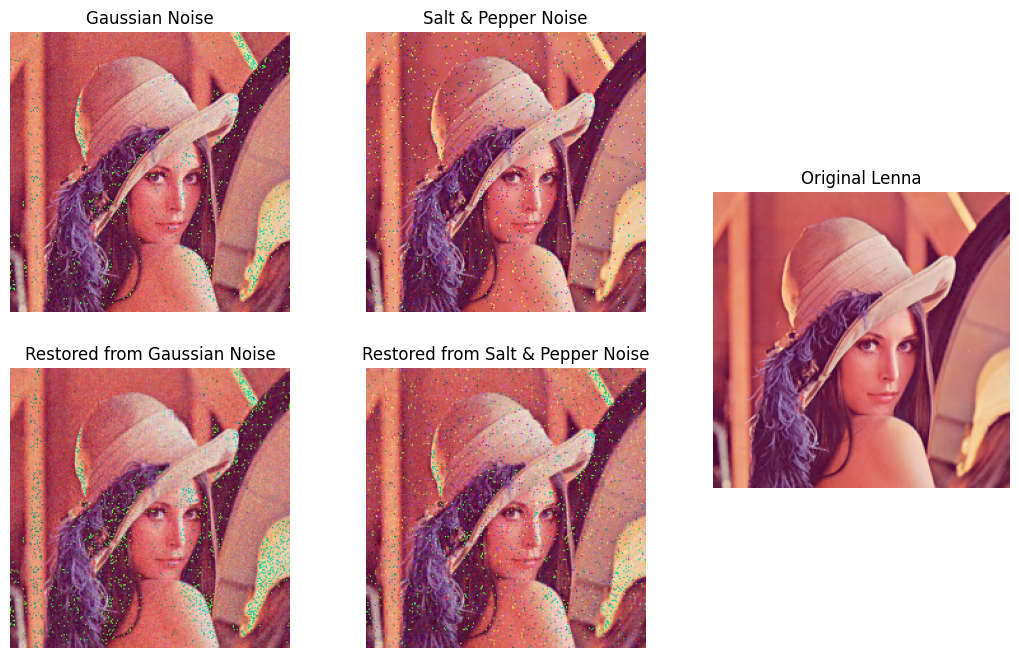

In [47]:
plt.figure(figsize=(13, 8))
k = 150 # feel free to change this value

# Plotting Gaussian Noised Singular Values
plt.subplot(2, 3, 1)
plt.title('Gaussian Noise')
plt.axis('off')
plt.imshow(gas_img)

# Plotting Salt & Pepper Noised Singular Values
plt.subplot(2, 3, 2)
plt.title('Salt & Pepper Noise')
plt.axis('off')
plt.imshow(sp_img)

# Plotting Lenna Minus Lenna Singular Values
plt.subplot(2, 3, 4)
plt.axis('off')
plt.title('Restored from Gaussian Noise')
denoised = apply_on_channels(gas_img, remove_k_smallest(k))
plt.imshow(denoised)
    
# Plotting Salt & Pepper Noised Minus Lenna Singular Values
plt.subplot(2, 3, 5)
plt.axis('off')
plt.title('Restored from Salt & Pepper Noise')
denoised = apply_on_channels(sp_img, remove_k_smallest(k))
plt.imshow(denoised)

# We do not plot anything below the original Lenna
# Plotting the Original Lenna
plt.subplot(1, 3, 3)
plt.title('Original Lenna')
plt.axis('off')
plt.ylabel("Singular Values")
plt.imshow(lenna_img)



Thanks for your attention! This notebook is available in the link below😀

https://drive.google.com/file/d/12-2DqpxJmq5Ra58B36aWDBNtnKwtKdv1/view?usp=sharing